In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import seaborn as sns

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df=pd.read_csv("/content/drive/My Drive/train_task_01.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
encoder=LabelEncoder()
for cols in df.columns:
  if df[cols].dtype=='object':
    df[cols]=encoder.fit_transform(df[cols])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [68]:
df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.010601,-0.033226,0.008916,-0.001530,0.032122,-0.019659,0.013324,...,0.057044,-0.033928,-0.000399,0.037057,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.386347,-0.139781,-0.024969,-0.105995,0.119289,-0.002940,-0.022844,...,0.008283,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.111690,-0.034452,0.087654,-0.052039,0.061887,-0.017854,-0.001192,...,-0.003128,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.010601,-0.386347,-0.111690,1.000000,0.426095,-0.040886,0.138101,-0.169641,-0.080757,NaN,...,0.206167,-0.195051,-0.040862,-0.006629,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.033226,-0.139781,-0.034452,0.426095,1.000000,-0.197131,0.060105,-0.165315,-0.149083,0.010123,...,0.077672,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.011200,0.001205,0.003690,0.013094,-0.033455,-0.011599,-0.051552,...,-0.033737,0.036368,-0.009892,-0.014193,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,0.007450,-0.014261,-0.025043,0.020944,0.036449,0.020507,0.023353,...,-0.059689,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.034559,0.012292,0.014339,0.008205,-0.000911,-0.025754,-0.126770,...,0.011009,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.063372,0.034169,0.006064,0.035717,-0.038118,0.033809,-0.089701,...,-0.067251,0.097425,0.100675,0.003192,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [69]:
req_col=['GarageArea','OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','SalePrice']
train_df=df[req_col]
train_df.head()

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000


In [70]:
train_df.loc[:,'TotalBath']=train_df.iloc[:,7]+train_df.iloc[:,8]+train_df.iloc[:,9]+train_df.iloc[:,10]
train_df.loc[:,'TotalSF']=train_df.iloc[:,6]+train_df.iloc[:,2]+train_df.iloc[:,3]+train_df.iloc[:,4]+train_df.iloc[:,5]
train_df.head()


<ipython-input-70-6ee27a068a12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'TotalBath']=train_df.iloc[:,7]+train_df.iloc[:,8]+train_df.iloc[:,9]+train_df.iloc[:,10]
<ipython-input-70-6ee27a068a12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'TotalSF']=train_df.iloc[:,6]+train_df.iloc[:,2]+train_df.iloc[:,3]+train_df.iloc[:,4]+train_df.iloc[:,5]


,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,4276
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,3786
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,4492
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,4190
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,5541


In [71]:
train_df = train_df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                                  'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])

In [72]:
columns = train_df.columns.tolist()
idx_A, idx_B = columns.index('TotalSF'), columns.index('SalePrice')
columns[idx_A], columns[idx_B] = columns[idx_B], columns[idx_A]
train_df = train_df[columns]
train_df.head()

,GarageArea,OverallQual,TotRmsAbvGrd,TotalSF,TotalBath,SalePrice
0,548,7,8,4276,4,208500
1,460,6,6,3786,3,181500
2,608,7,6,4492,4,223500
3,642,7,7,4190,2,140000
4,836,8,9,5541,4,250000


In [73]:
  train_set,test_set=train_test_split(train_df,test_size=0.2,random_state=42)
  print("rows and cols of training data:",train_set.shape)
  print("rows and cols of testing data:",test_set.shape)

rows and cols of training data: (1168, 6)
rows and cols of testing data: (292, 6)


In [74]:
housing=train_set.drop("SalePrice",axis=1)
housing_labels=train_set['SalePrice'].copy()

In [75]:
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
('std_scaler',StandardScaler())
])

In [76]:
x_train=my_pipeline.fit_transform(housing)

In [77]:
x_train

array([[-0.86383727, -0.82044456, -0.96456591, -0.13352109, -0.48377079],
       [-0.45626397, -0.08893368,  0.27075534, -0.13428593,  0.61127627],
       [-2.25716927, -0.82044456, -1.58222654, -1.32207838, -1.57881784],
       ...,
       [ 0.45366713, -0.82044456, -0.96456591, -1.16605156, -0.48377079],
       [-1.23349678,  0.64257719,  0.27075534, -0.26966215, -0.48377079],
       [ 0.87071888,  0.64257719,  0.27075534,  0.28025593, -0.48377079]])

In [78]:
y_train=housing_labels

<function matplotlib.pyplot.show(close=None, block=None)>

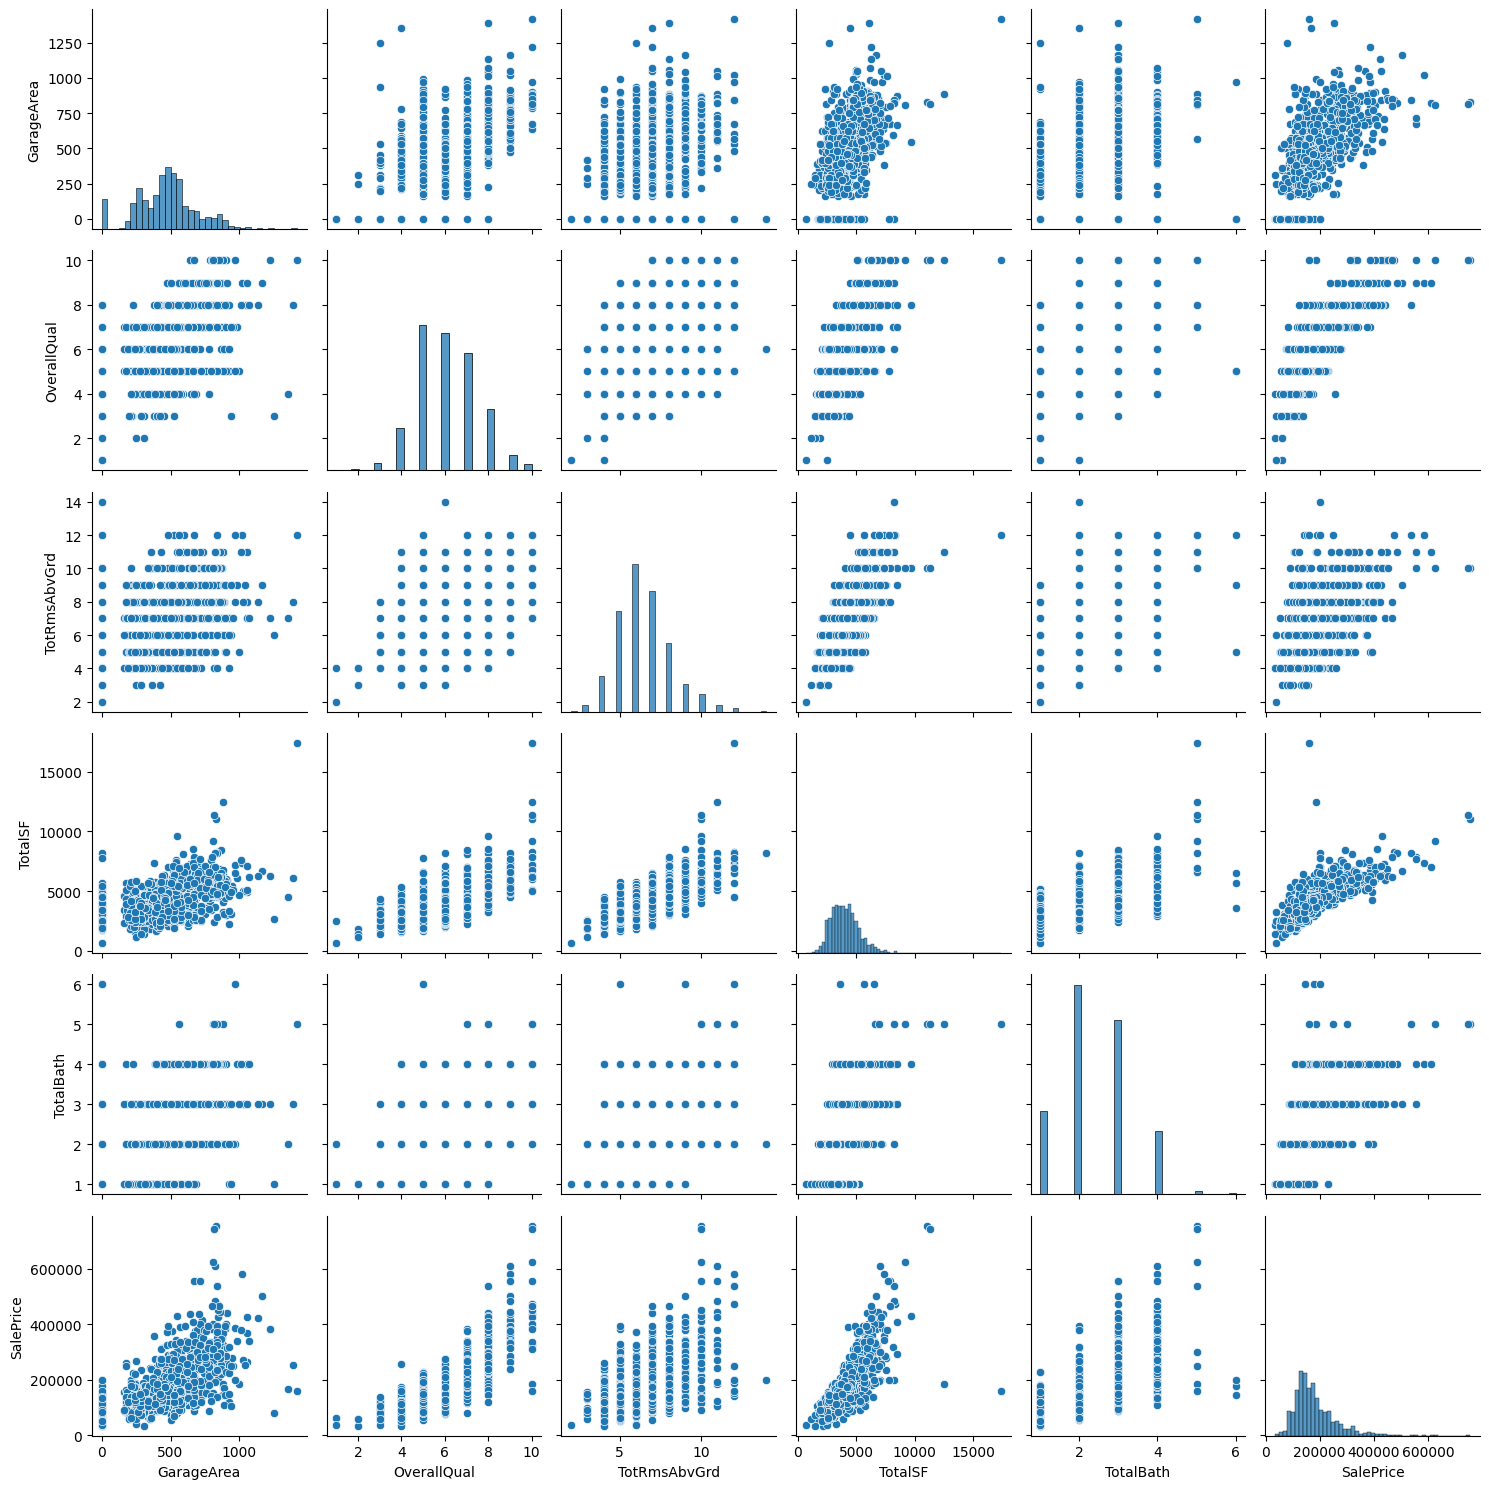

In [79]:

%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show

In [80]:
train_df.corr()

,GarageArea,OverallQual,TotRmsAbvGrd,TotalSF,TotalBath,SalePrice
GarageArea,1.000000,0.562022,0.337822,0.539186,0.425791,0.623431
OverallQual,0.562022,1.000000,0.427452,0.655790,0.529906,0.790982
TotRmsAbvGrd,0.337822,0.427452,1.000000,0.757821,0.482310,0.533723
TotalSF,0.539186,0.655790,0.757821,1.000000,0.609019,0.773909
TotalBath,0.425791,0.529906,0.482310,0.609019,1.000000,0.613005
SalePrice,0.623431,0.790982,0.533723,0.773909,0.613005,1.000000


<Axes: >

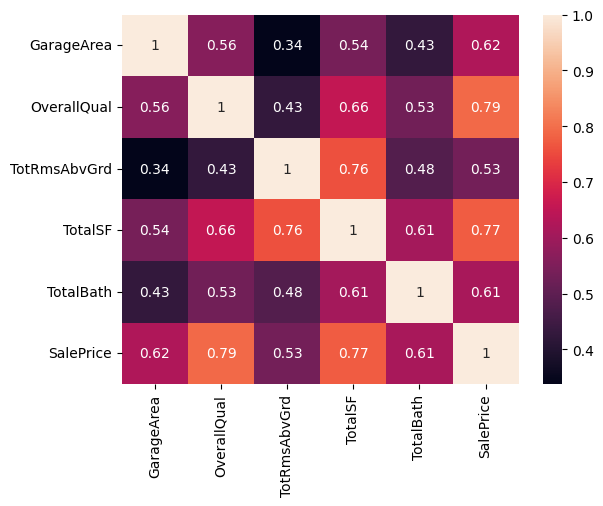

In [81]:
sns.heatmap(train_df.corr(),annot=True)

In [82]:
test_df=pd.read_csv('/content/drive/My Drive/test.csv')

In [83]:
test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [84]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [85]:
req_tst=['GarageArea','OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd']
test_df=test_df[req_tst]


In [86]:
test_df.loc[:,'TotalBath']=test_df.iloc[:,7]+test_df.iloc[:,8]+test_df.iloc[:,9]+test_df.iloc[:,10]
test_df.loc[:,'TotalSF']=test_df.iloc[:,6]+test_df.iloc[:,2]+test_df.iloc[:,3]+test_df.iloc[:,4]+test_df.iloc[:,5]



<ipython-input-86-c7bb2c207e83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:,'TotalBath']=test_df.iloc[:,7]+test_df.iloc[:,8]+test_df.iloc[:,9]+test_df.iloc[:,10]
<ipython-input-86-c7bb2c207e83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:,'TotalSF']=test_df.iloc[:,6]+test_df.iloc[:,2]+test_df.iloc[:,3]+test_df.iloc[:,4]+test_df.iloc[:,5]


In [87]:
test_df = test_df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                                  'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])
test_df.head()

,GarageArea,OverallQual,TotRmsAbvGrd,TotalBath,TotalSF
0,730.0,5,5,1.0,2674.0
1,312.0,6,6,2.0,3987.0
2,482.0,5,6,3.0,4186.0
3,470.0,6,7,3.0,4134.0
4,506.0,8,5,2.0,3840.0


In [88]:
colums = test_df.columns.tolist()
index1, index2 = columns.index('TotalBath'), columns.index('TotalSF')
colums[index1], colums[index2] = colums[index2], colums[index1]
test_df= test_df[colums]
test_df.head()

,GarageArea,OverallQual,TotRmsAbvGrd,TotalSF,TotalBath
0,730.0,5,5,2674.0,1.0
1,312.0,6,6,3987.0,2.0
2,482.0,5,6,4186.0,3.0
3,470.0,6,7,4134.0,3.0
4,506.0,8,5,3840.0,2.0


In [89]:
test_df1=test_df.fillna(test_df.mean())

In [90]:
x_test=my_pipeline.transform(test_df1)

In [91]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [92]:
y_train_pred=model.predict(x_train)

In [93]:
y_train_pred[:5]

array([137667.57956441, 175034.19941421,  79632.65207176, 149652.98819495,
       146674.06395314])

In [94]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [95]:
proc_data = my_pipeline.transform(some_data)

In [96]:

model.predict(proc_data)

array([137667.57956441, 175034.19941421,  79632.65207176, 149652.98819495,
       146674.06395314])

In [97]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [98]:
train_mse = mean_squared_error(y_train,y_train_pred)

In [99]:
train_rmse = np.sqrt(train_mse)

In [100]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")

Training MSE: 1460715662.52, Training RMSE: 38219.31


In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv = 200)
rmse_scores = np.sqrt(-scores)

In [102]:

rmse_scores

array([ 16599.40639047,  18325.22018653,  29307.41492256,  30900.62181786,
        42713.28158503,  13517.92728875,  28466.43684333,  26159.1789478 ,
        16694.35747291,  44185.04242239,  14432.4514348 ,  29621.4888739 ,
        15288.08646946,  20343.83312791,  26928.48898473,  30286.90600734,
        27591.27659228,  49704.26333128,  48966.56719948,  24506.05029869,
        51513.14668133,  16136.46039114,  18384.50681523,  28433.24926957,
        55483.42476232,  13885.14122222,  40018.30732342,  22655.21809999,
       122894.24572375,  36980.15773466,  16527.48051189,  26495.91857289,
        40892.94110057,  26980.63750536,  67733.44140093,  13173.00917782,
        17673.54848644,  28785.9566716 ,  34551.83798472,  37734.44853911,
        23765.3506236 ,  19538.738731  ,  29343.3959128 ,  32180.98454967,
        35319.05373078,  38228.16511844,  26372.59349178,  28064.67081093,
        36009.27109903,  26029.75222025,  22669.10866239,  37583.20518266,
        27672.46756544,  

In [103]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())

In [104]:
print_scores(rmse_scores)

Scores: [ 16599.40639047  18325.22018653  29307.41492256  30900.62181786
  42713.28158503  13517.92728875  28466.43684333  26159.1789478
  16694.35747291  44185.04242239  14432.4514348   29621.4888739
  15288.08646946  20343.83312791  26928.48898473  30286.90600734
  27591.27659228  49704.26333128  48966.56719948  24506.05029869
  51513.14668133  16136.46039114  18384.50681523  28433.24926957
  55483.42476232  13885.14122222  40018.30732342  22655.21809999
 122894.24572375  36980.15773466  16527.48051189  26495.91857289
  40892.94110057  26980.63750536  67733.44140093  13173.00917782
  17673.54848644  28785.9566716   34551.83798472  37734.44853911
  23765.3506236   19538.738731    29343.3959128   32180.98454967
  35319.05373078  38228.16511844  26372.59349178  28064.67081093
  36009.27109903  26029.75222025  22669.10866239  37583.20518266
  27672.46756544  26860.18618909  25473.16521999  21242.95056337
  20053.45561874  30889.23473073  52117.08856944  36544.31900032
 133524.62025163  4

In [105]:
y_pred=model.predict(x_test)

In [106]:
y_pred

array([126103.27519237, 162326.84508263, 163127.91620663, ...,
       145956.58005073,  97528.78037618, 233363.14624566])

In [108]:

pred = pd.DataFrame(y_pred, columns=['SalePrice'])
sub_df = pd.read_csv("/content/drive/My Drive/sample_test.csv")

if len(sub_df['Id']) == len(pred):

    datasets = pd.concat([sub_df['Id'], pred], axis=1)


    datasets.columns = ['Id', 'SalePrice']

    datasets.to_csv('/content/drive/My Drive/sample_test.csv', index=False)
else:
    print("Error: The number of predictions does not match the number of Ids.")
